# Data visualization

This test allows us to corroborate the proper interpretation of the data of the spectral energy distributions coming from the active galaxies in the example.

## SED plots from example (AGNfitter v1.0)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Data format
# Name, redshift, wavelength [x10**(-10)], Intensity [Jy], data uncertainty [Jy] and so on and so forth
SED = np.loadtxt("Examples/catalog_example.txt")

#Observed
f_obs = (3*10**8)/(SED[0, 2::3]*10**(-10))      # Observed frequency [Hz]
data = SED[0, 3::3]                             # Spectral flux density [Jy] 
error = f_obs*SED[0, 4::3]*1e23                 # Uncertainty [Jy Hz] --> [erg s⁻¹ cm⁻²]
flux =  f_obs*data*1e23                         # Flux [erg s⁻¹ cm⁻²]

#Rest frame
z = 0.283                                       # Redshift
f_rest = f_obs*(1+z)                            # Rest frame frequency [Hz]   
flux_rest =  f_rest*data*1e23                   # Rest frame flux [erg s⁻¹ cm⁻²]
error_rest = f_rest*SED[0, 4::3]*1e23           # Rest frame uncertainty [Jy Hz] --> [erg s⁻¹ cm⁻²]

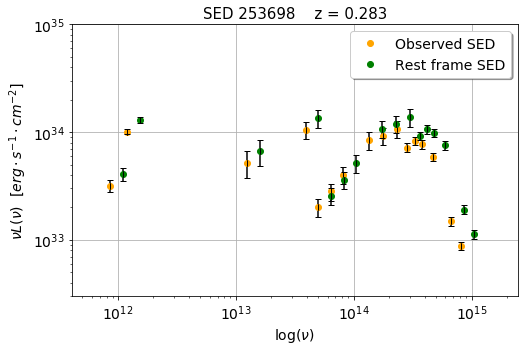

In [3]:
fig = plt.figure(figsize=(8, 5))
plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1} \cdot cm^{-2}]$', fontsize = 14) 
plt.xlabel(r'log($\nu$) ', fontsize = 14) 
plt.loglog(f_obs, flux,color = 'orange', marker = 'o', linestyle = '', label = 'Observed SED')
(_, caps, _) = plt.errorbar(f_obs,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.loglog(f_rest, flux_rest ,color = 'green', marker = 'o', linestyle = '', label = 'Rest frame SED')
(_, caps, _) = plt.errorbar(f_rest,  flux_rest, yerr=  error_rest, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.grid() 
plt.title('SED 253698    z = ' + str(z), fontsize = 15)
plt.legend(fontsize = 14, shadow = True)
plt.ylim(3*1e32, 1e35)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

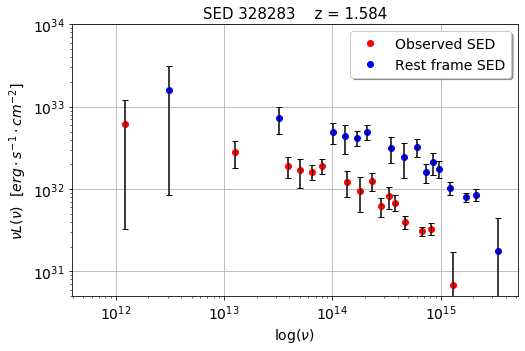

In [4]:
#Observed
f2_obs = (3*10**8)/(SED[1, 2::3]*10**(-10))     # Observed frequency [Hz]
data2 = SED[1, 3::3]                            # Intensity [Jy] 
error2 = f2_obs*SED[1, 4::3]*1e23               # Uncertainty [Jy Hz] --> [erg s⁻¹ cm⁻²]
flux2 =  f2_obs*data2*1e23                      # Flux [erg s⁻¹ cm⁻²]

#Rest frame
z2 = 1.584                                      # Redshift
f2_rest = f2_obs*(1+z2)                         # Rest frame frequency [Hz]   
flux2_rest =  f2_rest*data2*1e23                # Rest frame flux [erg s⁻¹ cm⁻²]
error2_rest = f2_rest*SED[1, 4::3]*1e23         # Rest frame uncertainty [Jy Hz] --> [erg s⁻¹ cm⁻²]



fig = plt.figure(figsize=(8, 5))
plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1} \cdot cm^{-2}]$', fontsize = 14) 
plt.xlabel(r'log($\nu$) ', fontsize = 14) 
plt.loglog(f2_obs, flux2,color = 'red', marker = 'o', linestyle = '', label = 'Observed SED')
(_, caps, _) = plt.errorbar(f2_obs,  flux2, yerr=  error2, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.loglog(f2_rest, flux2_rest ,color = 'blue', marker = 'o', linestyle = '', label = 'Rest frame SED')
(_, caps, _) = plt.errorbar(f2_rest,  flux2_rest, yerr=  error2_rest, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.grid() 
plt.title('SED 328283    z = ' + str(z2), fontsize = 15)
plt.legend(fontsize = 14, shadow = True)
plt.ylim(5*1e30, 1e34)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

## Plot of a telescope filter

Visualization of telescope filter:

In [5]:
# Subaru telescope transfer function (optical and IR)
Subaru_B = pd.read_csv("Filters/B_subaru.res", sep="  ", decimal=".", names = ['wl', 'I'], skiprows = 0, engine='python')

wl_SB = Subaru_B['wl']*10**(-1) # wavelength [nm]
I_SB = Subaru_B['I'] # Intensity

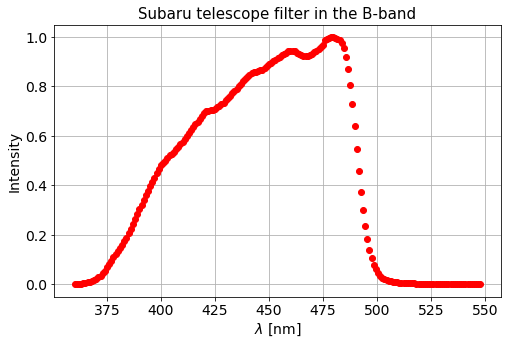

In [6]:
fig = plt.figure(figsize=(8, 5))
plt.ylabel(r'Intensity', fontsize = 14) 
plt.xlabel(r'$\lambda$ [nm]', fontsize = 14) 
plt.plot(wl_SB, I_SB ,color = 'r', marker = 'o', linestyle = '')
plt.grid() 
plt.title('Subaru telescope filter in the B-band', fontsize = 15)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

Is valid the approximation of central wavelength in v_2.0?

In [7]:
# Data format
SPIRE250 = pd.read_csv("Filters/SPIRE_250mu.txt", delim_whitespace=True,  names = ['wl', 'I'], decimal=".", skiprows = 0)
SPIRE350 = pd.read_csv("Filters/SPIRE_350mu.txt", delim_whitespace=True,  names = ['wl', 'I'], decimal=".", skiprows = 0)
PACS100 = pd.read_csv("Filters/PACS_100mu.txt", delim_whitespace=True,  names = ['wl', 'I'], decimal=".", skiprows = 0)
MIPS70 = pd.read_csv("Filters/mips70.res", delim_whitespace=True,  names = ['wl', 'I'], decimal=".", skiprows = 9)

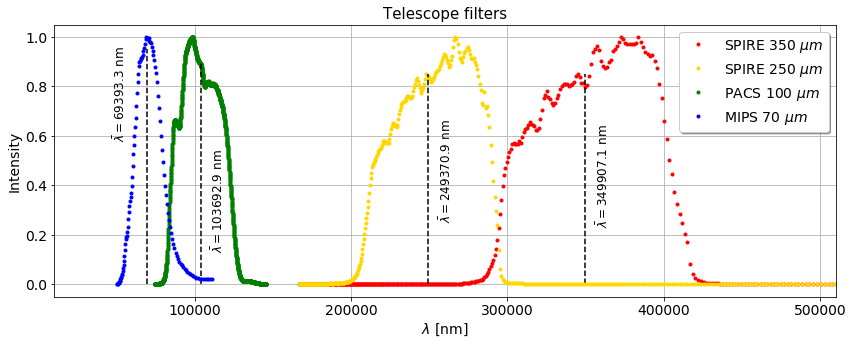

In [8]:
fig = plt.figure(figsize=(14, 5))
plt.ylabel(r'Intensity', fontsize = 14) 
plt.xlabel(r'$\lambda$ [nm]', fontsize = 14) 

plt.plot(SPIRE350['wl']*1e-1, SPIRE350['I'],color = 'r', marker = '.', linestyle = '', label = r'SPIRE 350 $\mu m$')
plt.plot([3499071*1e-1,3499071*1e-1],[0, 0.85],color ='black',  linewidth=1.5, linestyle="--")
plt.annotate(r'$\bar{\lambda} = 349907.1$ nm', xy=(3499071*1e-1, 0.2), 
             xycoords='data',xytext=(+10, +10), textcoords='offset points', fontsize=12, rotation = 90)

plt.plot(SPIRE250['wl']*1e-1, SPIRE250['I'],color = 'gold', marker = '.', linestyle = '', label = r'SPIRE 250 $\mu m$')
plt.plot([2493709*1e-1,2493709*1e-1],[0, 0.85],color ='black',  linewidth=1.5, linestyle="--")
plt.annotate(r'$\bar{\lambda} = 249370.9$ nm', xy=(2493709*1e-1, 0.22), 
             xycoords='data',xytext=(+10, +10), textcoords='offset points', fontsize=12, rotation = 90)

plt.plot(PACS100['wl']*1e-1, PACS100['I'] ,color = 'g', marker = '.', linestyle = '', label = r'PACS 100 $\mu m$')
plt.plot([1036929*1e-1,1036929*1e-1],[0, 0.90],color ='black',  linewidth=1.5, linestyle="--")
plt.annotate(r'$\bar{\lambda} = 103692.9$ nm', xy=(1036929*1e-1, 0.1), 
             xycoords='data',xytext=(+10, +10), textcoords='offset points', fontsize=12,  rotation = 90)

plt.plot(MIPS70['wl']*1e-1, MIPS70['I'],color = 'b', marker = '.', linestyle = '', label = r'MIPS 70 $\mu m$')
plt.plot([693933*1e-1,693933*1e-1],[0, 0.95],color ='black',  linewidth=1.5, linestyle="--")
plt.annotate(r'$\bar{\lambda} = 69393.3$ nm', xy=(693933*1e-1, 0.55), 
             xycoords='data',xytext=(-35, +10), textcoords='offset points', fontsize=12,  rotation = 90)

plt.grid() 
plt.title(r'Telescope filters', fontsize = 15)
plt.legend(fontsize = 14, shadow = True)
plt.xlim(1e4,5.1*1e5)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

## Plots of Brown data

In [9]:
# Data format
# Number, Name, redshift, wavelength [x10**(-10)], Intensity [Jy], data uncertainty [Jy] and so on and so forth
SED_Brown_obs = pd.read_csv("Brown_data/brown2018_obs_agnfitter.txt", delim_whitespace=True, decimal=".", skiprows = 0)

The SEDs of the first 3 galaxies will be plotted.

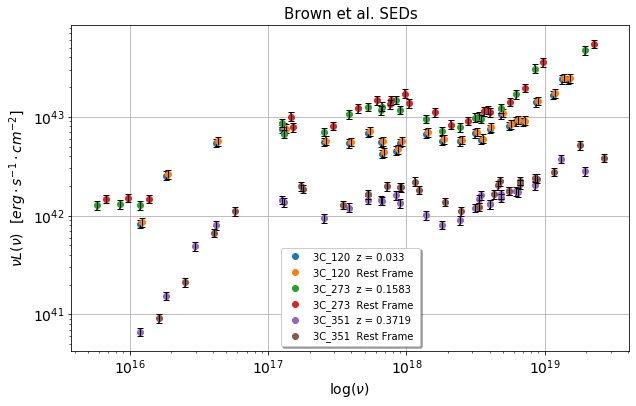

In [10]:
fig = plt.figure(figsize=(10, 6))
plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1} \cdot cm^{-2}]$', fontsize = 14) 
plt.xlabel(r'log($\nu$) ', fontsize = 14) 

for i in range(1, 4):
    z = SED_Brown_obs.iloc[i, 2]                                      # Redshift
    f_obs = (3*1e8)/(np.array(SED_Brown_obs.iloc[i, 3::3])*1e-10)     # Observed frequency [Hz]
    data = np.array(SED_Brown_obs.iloc[i, 4::3])                      # Spectral flux density [Jy]
    error = f_obs*np.array(SED_Brown_obs.iloc[i, 5::3])*1e23          # Uncertainty [Jy Hz] --> [erg s⁻¹ cm⁻²]
    flux = f_obs*data*1e23                                            # Flux [erg s⁻¹ cm⁻²]
    name = SED_Brown_obs.iloc[i, 1]                                   # Source name
    
    # OBSERVED SED
    plt.loglog(f_obs, flux, marker = 'o', linestyle = '', label = str(name) + '  z = ' + str(round(z,4)))
    (_, caps, _) = plt.errorbar(f_obs,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
    for cap in caps:
        cap.set_markeredgewidth(1)
    
    f_rest = f_obs*(1+z)                                           # Rest frame frequency [Hz]   
    flux_rest =  f_rest*data*1e23                                  # Rest frame flux [erg s⁻¹ cm⁻²]
    error_rest = f_rest*np.array(SED_Brown_obs.iloc[i, 5::3])*1e23 # Rest frame uncertainty [erg s⁻¹ cm⁻²]
    
    # REST FRAME SED
    plt.loglog(f_rest, flux_rest, marker = 'o', linestyle = '', label = str(name) + '  Rest Frame ')
    (_, caps, _) = plt.errorbar(f_rest,  flux_rest, yerr=  error_rest, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
    for cap in caps:
        cap.set_markeredgewidth(1)
    
plt.grid() 
plt.title('Brown et al. SEDs', fontsize = 15)
plt.legend(fontsize = 10, shadow = True, loc=8)
#plt.ylim(3*1e32, 1e35)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

In [11]:
# Data format
# Number, Name, redshift, wavelength [x10**(-10)], Intensity [Jy], data uncertainty [Jy] and so on and so forth
SED_Brown_syn = pd.read_csv("Brown_data/brown2018_syn_agnfitter-2.txt", delim_whitespace=True, decimal=".", skiprows = 0)

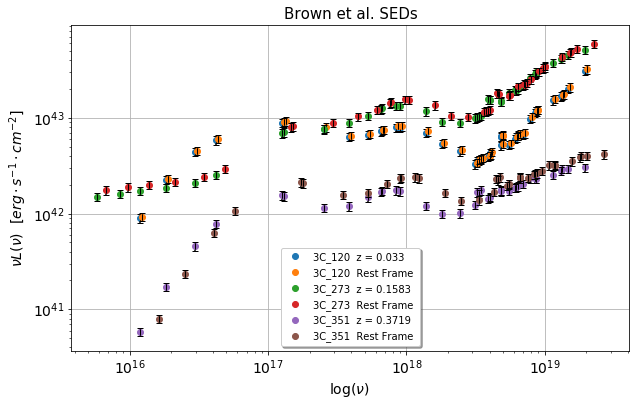

In [12]:
fig = plt.figure(figsize=(10, 6))
plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1} \cdot cm^{-2}]$', fontsize = 14) 
plt.xlabel(r'log($\nu$) ', fontsize = 14) 

for i in range(1, 4):
    z = SED_Brown_syn.iloc[i, 2]                                      # Redshift
    f_obs = (3*1e8)/(np.array(SED_Brown_syn.iloc[i, 3::3])*1e-10)     # Observed frequency [Hz]
    data = np.array(SED_Brown_syn.iloc[i, 4::3])                      # Spectral flux density [Jy]
    error = f_obs*np.array(SED_Brown_syn.iloc[i, 5::3])*1e23          # Uncertainty [Jy Hz] --> [erg s⁻¹ cm⁻²]
    flux = f_obs*data*1e23                                            # Flux [erg s⁻¹ cm⁻²]
    name = SED_Brown_syn.iloc[i, 1]                                   # Source name
    
    # OBSERVED SED
    plt.loglog(f_obs, flux, marker = 'o', linestyle = '', label = str(name) + '  z = ' + str(round(z,4)))
    (_, caps, _) = plt.errorbar(f_obs,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
    for cap in caps:
        cap.set_markeredgewidth(1)
    
    f_rest = f_obs*(1+z)                                           # Rest frame frequency [Hz]   
    flux_rest =  f_rest*data*1e23                                  # Rest frame flux [erg s⁻¹ cm⁻²]
    error_rest = f_rest*np.array(SED_Brown_syn.iloc[i, 5::3])*1e23 # Rest frame uncertainty [erg s⁻¹ cm⁻²]
    
    # REST FRAME SED
    plt.loglog(f_rest, flux_rest, marker = 'o', linestyle = '', label = str(name) + '  Rest Frame ')
    (_, caps, _) = plt.errorbar(f_rest,  flux_rest, yerr=  error_rest, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
    for cap in caps:
        cap.set_markeredgewidth(1)
    
plt.grid() 
plt.title('Brown et al. SEDs', fontsize = 15)
plt.legend(fontsize = 10, shadow = True, loc=8)
#plt.ylim(3*1e32, 1e35)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

## Dictionaries handling

To understand and redefine the line 142 in RUN_AGNfitter_multi.py

In [13]:
# Dictionary similar to FILTERS_settings() in SETTINGS_AGNfitter.py
filters_settings = dict(z = np.array([0.894, 2.43, 0.731]), path= 'models/FILTERS/', SPIRE500 = [True, 29], Ks_VISTA = [False, 3], r_SDSS= [True, 4], add_filters = False)
filters_settings.keys()

dict_keys(['z', 'path', 'SPIRE500', 'Ks_VISTA', 'r_SDSS', 'add_filters'])

In [14]:
# To choose the type non-booleans values with first position == True --> Filters
[filters_settings[i] for i in filters_settings.keys() if type(filters_settings[i]) != bool and filters_settings[i][0] == True]

[[True, 29], [True, 4]]

In [15]:
# To count and choose the type list values with first position == True --> Filters
print(len([filters_settings[i] for i in filters_settings.keys() if type(filters_settings[i]) == list and filters_settings[i][0] == True]))

# To corroborate that these are filters
print([i for i in filters_settings.keys() if type(filters_settings[i]) == list and filters_settings[i][0] == True])

2
['SPIRE500', 'r_SDSS']


## SED plots from example (AGNfitter v2.0)

In [16]:
# Data format
# Name, redshift, Intensity [Jy], data uncertainty [Jy] and so on and so forth
SED2 = np.loadtxt("Examples/catalog_example2.txt")

#Telescopes wavelengths
l_c = [1516, 2304, 3591, 4723, 6213, 7523, 8855, 4866, 6215, 7545, 8679, 9633, 8798, 10214, 12535, 16453, 21540, 10319, 12510, 16377, 22083, 33792, 46293, 123337, 222532, 1036929, 1697692, 2493709, 3499071, 5041086]

#Observed
f_obs = [(3*10**8)/(i*10**(-10)) for i in l_c]   # Observed frequency [Hz]
data = SED2[2, 2::2]                             # Intensity [Jy] 
error = f_obs*SED2[2, 3::2]*1e23                 # Uncertainty [Jy Hz] --> [erg s⁻¹ cm⁻²]
flux =  f_obs*data*1e23                          # Flux [erg s⁻¹ cm⁻²]

#Rest frame
z = 0.731                                       # Redshift
f_rest = [i*(1+z) for i in f_obs]               # Rest frame frequency [Hz]   
flux_rest =  f_rest*data*1e23                   # Rest frame flux [erg s⁻¹ cm⁻²]
error_rest = f_rest*SED2[2, 3::2]*1e23          # Rest frame uncertainty [Jy Hz] --> [erg s⁻¹ cm⁻²]

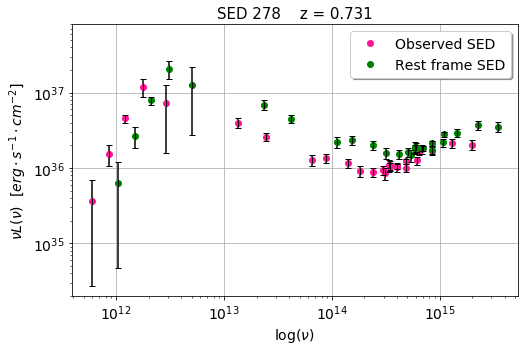

In [17]:
fig = plt.figure(figsize=(8, 5))
plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1} \cdot cm^{-2}]$', fontsize = 14) 
plt.xlabel(r'log($\nu$) ', fontsize = 14) 
plt.loglog(f_obs, flux,color = 'deeppink', marker = 'o', linestyle = '', label = 'Observed SED')
(_, caps, _) = plt.errorbar(f_obs,  flux, yerr=  error, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.loglog(f_rest, flux_rest ,color = 'green', marker = 'o', linestyle = '', label = 'Rest frame SED')
(_, caps, _) = plt.errorbar(f_rest,  flux_rest, yerr=  error_rest, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.grid() 
plt.title('SED 278    z = ' + str(z), fontsize = 15)
plt.legend(fontsize = 14, shadow = True)
plt.ylim(2*1e34, 8*1e37)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

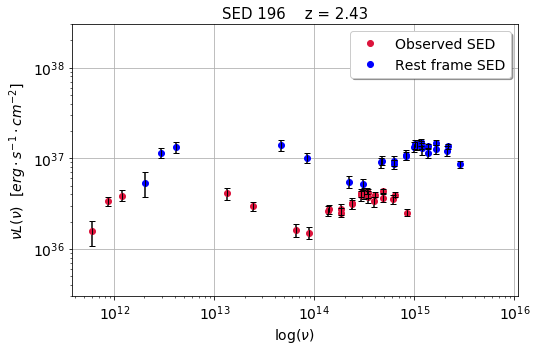

In [18]:
#Observed
f_obs = [(3*10**8)/(i*10**(-10)) for i in l_c]    # Observed frequency [Hz]
data2 = SED2[1, 2::2]                             # Intensity [Jy] 
error2 = f_obs*SED2[1, 3::2]*1e23                 # Uncertainty [Jy Hz] --> [erg s⁻¹ cm⁻²]
flux2 =  f_obs*data2*1e23                         # Flux [erg s⁻¹ cm⁻²]

#Rest frame
z2 = 2.43                                       # Redshift
f_rest = [i*(1+z2) for i in f_obs]               # Rest frame frequency [Hz]   
flux2_rest =  f_rest*data2*1e23                 # Rest frame flux [erg s⁻¹ cm⁻²]
error2_rest = f_rest*SED2[1, 3::2]*1e23         # Rest frame uncertainty [Jy Hz] --> [erg s⁻¹ cm⁻²]


fig = plt.figure(figsize=(8, 5))
plt.ylabel(r'$\nu L(\nu)$  $[erg \cdot s^{-1} \cdot cm^{-2}]$', fontsize = 14) 
plt.xlabel(r'log($\nu$) ', fontsize = 14) 
plt.loglog(f_obs, flux2,color = 'crimson', marker = 'o', linestyle = '', label = 'Observed SED')
(_, caps, _) = plt.errorbar(f_obs,  flux2, yerr=  error2, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.loglog(f_rest, flux2_rest ,color = 'blue', marker = 'o', linestyle = '', label = 'Rest frame SED')
(_, caps, _) = plt.errorbar(f_rest,  flux2_rest, yerr=  error2_rest, xerr = 0,  fmt='o', markersize=0, capsize=3, color = 'black')
for cap in caps:
    cap.set_markeredgewidth(1)
    
plt.grid() 
plt.title('SED 196    z = ' + str(z2), fontsize = 15)
plt.legend(fontsize = 14, shadow = True)
plt.ylim(3*1e35, 3*1e38)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()


## Run options

You can:
- To choose the number of cpus to multiprocessing
- To run the code for a specific single source
- To create independent model dictionaries for each source
- To overwrite model files

<img src="Examples/Run_options.png" width="850">

## Independent vs non-independent model dictionaries

It is important to create one model dictionary per source according to the redshift of each one. If a global model dictionary is used, the contributions of each components are differents and therefore the physical properties of the active galaxy.

<table><tr><td><img src="Examples/SED_196_i.png" width="850"></td><td><img src="Examples/SED_196_ni.png" width="800"></td></tr></table>